# CNN with CIFAR-10 Dataset

In [4]:
from keras.datasets import cifar10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()

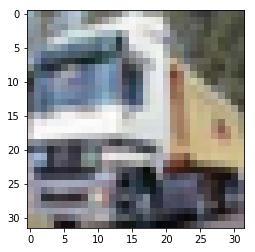

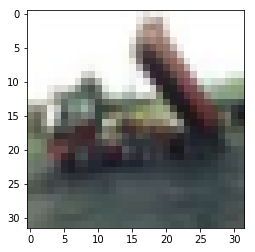

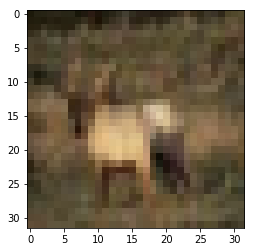

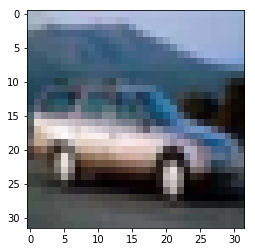

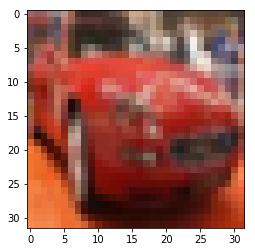

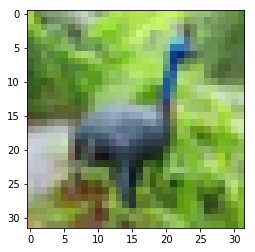

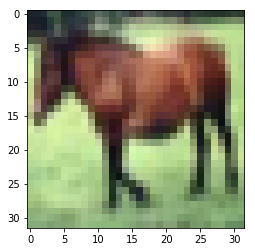

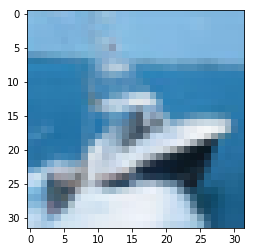

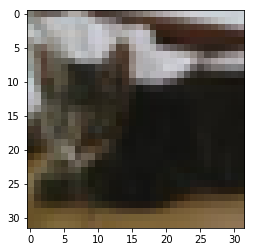

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    imgplot = plt.imshow(x_train[i])
    plt.figure(i+1)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

## normalize input images

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

## one-hot encode labels

In [6]:
import keras
from collections import Set

In [7]:
import numpy as np
np.amax(y_train)

9

In [8]:
num_classes = np.amax(y_train) + 1

In [9]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
y_train.shape

(50000, 10)

## CNN models to train and test

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

In [12]:
checkpointer = ModelCheckpoint(filepath='./cnn.weights.best.hdf5',verbose=1,save_best_only=True)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [18]:
hist = model.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.1,callbacks=[checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 42s 938us/step - loss: 1.1295 - acc: 0.6037 - val_loss: 1.0176 - val_acc: 0.6438

Epoch 00001: val_loss improved from 1.12408 to 1.01762, saving model to ./CNN.weights.best.hdf5
Epoch 2/100
45000/45000 [==============================] - 38s 836us/step - loss: 1.0670 - acc: 0.6250 - val_loss: 1.1088 - val_acc: 0.6312

Epoch 00002: val_loss did not improve
Epoch 3/100
45000/45000 [==============================] - 38s 836us/step - loss: 1.0310 - acc: 0.6428 - val_loss: 1.0095 - val_acc: 0.6462

Epoch 00003: val_loss improved from 1.01762 to 1.00953, saving model to ./CNN.weights.best.hdf5
Epoch 4/100
45000/45000 [==============================] - 38s 836us/step - loss: 1.0121 - acc: 0.6521 - val_loss: 0.9561 - val_acc: 0.6734

Epoch 00004: val_loss improved from 1.00953 to 0.95609, saving model to ./CNN.weights.best.hdf5
Epoch 5/100
45000/45000 [==============================] - 38

45000/45000 [==============================] - 38s 835us/step - loss: 1.6103 - acc: 0.4521 - val_loss: 1.4156 - val_acc: 0.5140

Epoch 00045: val_loss did not improve
Epoch 46/100
45000/45000 [==============================] - 38s 834us/step - loss: 1.6168 - acc: 0.4495 - val_loss: 1.5645 - val_acc: 0.4608

Epoch 00046: val_loss did not improve
Epoch 47/100
45000/45000 [==============================] - 38s 835us/step - loss: 1.6198 - acc: 0.4489 - val_loss: 1.4538 - val_acc: 0.4588

Epoch 00047: val_loss did not improve
Epoch 48/100
45000/45000 [==============================] - 38s 834us/step - loss: 1.6170 - acc: 0.4453 - val_loss: 1.4101 - val_acc: 0.5344

Epoch 00048: val_loss did not improve
Epoch 49/100
45000/45000 [==============================] - 38s 836us/step - loss: 1.6551 - acc: 0.4365 - val_loss: 1.3607 - val_acc: 0.5300

Epoch 00049: val_loss did not improve
Epoch 50/100
45000/45000 [==============================] - 38s 836us/step - loss: 1.6705 - acc: 0.4294 - val_los


Epoch 00090: val_loss did not improve
Epoch 91/100
45000/45000 [==============================] - 37s 824us/step - loss: 1.8486 - acc: 0.3312 - val_loss: 1.6093 - val_acc: 0.4240

Epoch 00091: val_loss did not improve
Epoch 92/100
45000/45000 [==============================] - 37s 823us/step - loss: 1.8642 - acc: 0.3279 - val_loss: 1.8440 - val_acc: 0.3362

Epoch 00092: val_loss did not improve
Epoch 93/100
45000/45000 [==============================] - 37s 823us/step - loss: 1.8605 - acc: 0.3252 - val_loss: 4.2008 - val_acc: 0.2006

Epoch 00093: val_loss did not improve
Epoch 94/100
45000/45000 [==============================] - 37s 822us/step - loss: 1.8650 - acc: 0.3284 - val_loss: 1.8642 - val_acc: 0.3278

Epoch 00094: val_loss did not improve
Epoch 95/100
45000/45000 [==============================] - 37s 825us/step - loss: 1.8633 - acc: 0.3226 - val_loss: 1.6371 - val_acc: 0.3934

Epoch 00095: val_loss did not improve
Epoch 96/100
45000/45000 [==============================] - 3

In [13]:
model.load_weights('./cnn.weights.best.hdf5')
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 258us/step


[0.9318103715896606, 0.6808]

## Visualizing Some Predictions

In [14]:
y_hat = model.predict(x_test)
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

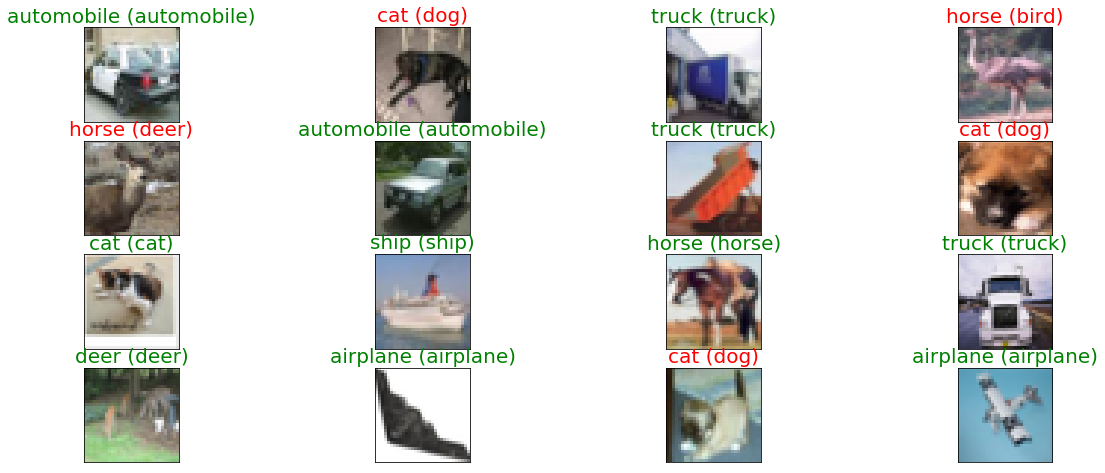

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(x_test.shape[0],size=16,replace=False)):
    ax = fig.add_subplot(4,4,i+1,xticks=[],yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx],cifar10_labels[true_idx]),\
                 color=('green' if pred_idx == true_idx else 'red'),\
                fontsize=20)